# Soil Fertility
Use elemetal soil analysis to determine the fertility of the soil.

**Input**
* N - ratio of Nitrogen (NH4+) content in soil
* P - ratio of Phosphorous (P) content in soil
* K - ratio of Potassium (K) content in soil
* ph - soil acidity (pH)
* ec - electrical conductivity
* oc - organic carbon
* S - sulfur (S)
* zn - Zinc (Zn)
* fe - Iron (Fe)
* cu - Copper (Cu)
* Mn - Manganese (Mn)
* B - Boron (B)

**Output**
* Class fertility (0 "Less Fertile", 1 "Fertile", 2 "Highly Fertile")


# Import Liberaries and Modules

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Get the data



In [14]:
rawData = pd.read_csv('dataset1.csv')
rawData.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


# Data Exploration

In [15]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
 12  Output  880 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 89.5 KB


No null values

In [16]:
rawData.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


In [17]:
rawData.rename(columns={"Output": "fertility"}, inplace=True)
rawData.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [18]:
rawData['fertility'].value_counts()

fertility
1    440
0    401
2     39
Name: count, dtype: int64

- 0 describes low-fertility
- 1 describes medium-fertility
- 2 describes high-fertility

In [19]:
rawDataCopy = rawData.copy()
rawDataCopy.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


Correlation is a statical technique to show the relation between variables and if they depend on each other.

In [20]:
corr = rawDataCopy.corr()

<Axes: >

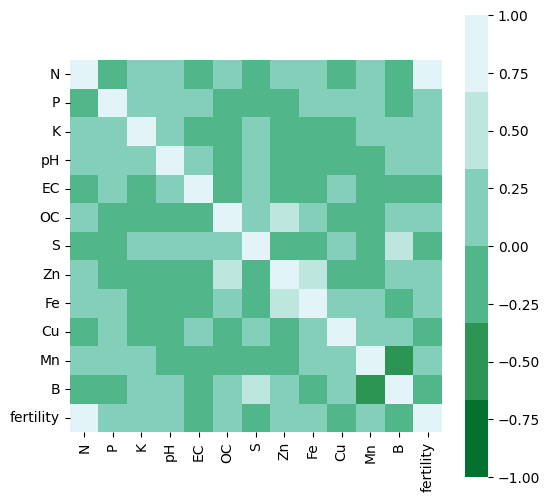

In [21]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr,
    cmap=sns.color_palette("BuGn_r"),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Divide data into X (features) and y (labels/targets).

In [22]:
labels = rawDataCopy[['fertility']]
features = rawDataCopy.drop('fertility', axis=1)

In [23]:
features.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26


In [24]:
labels.head()

,fertility
0,0
1,0
2,0
3,0
4,1


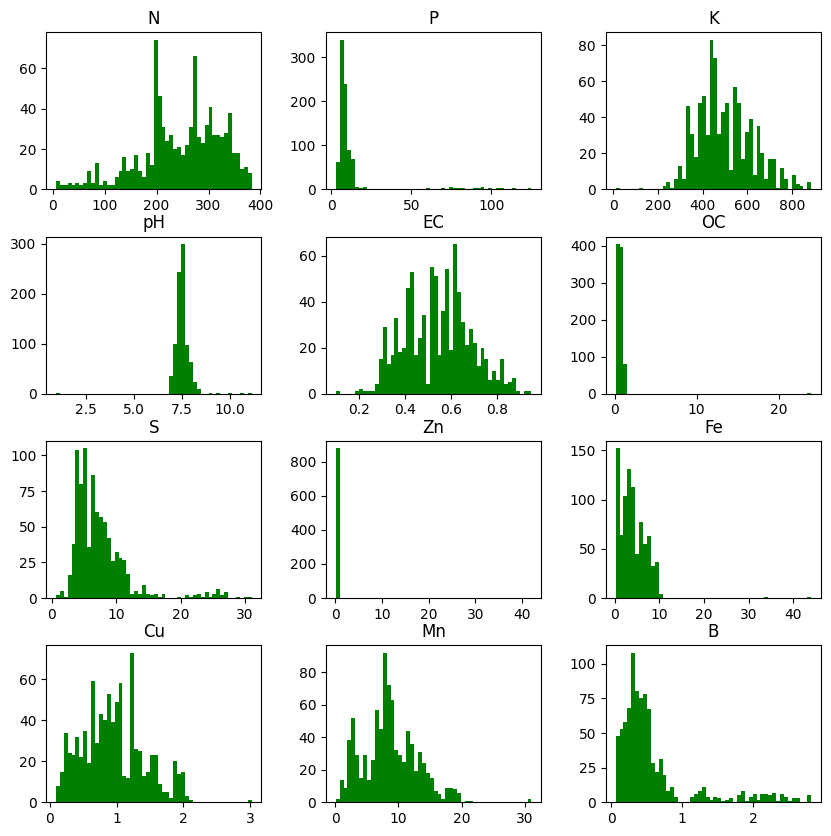

In [25]:
features.hist(bins=50, figsize=(10, 10), color ='green', grid=False)
plt.show()

# Prepare the Data for Machine Learning Algorithms

### Feature Scaling

We use Log Transform to convert skewed distibution to a normal distribution

In [26]:
transformedFeatures = features.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

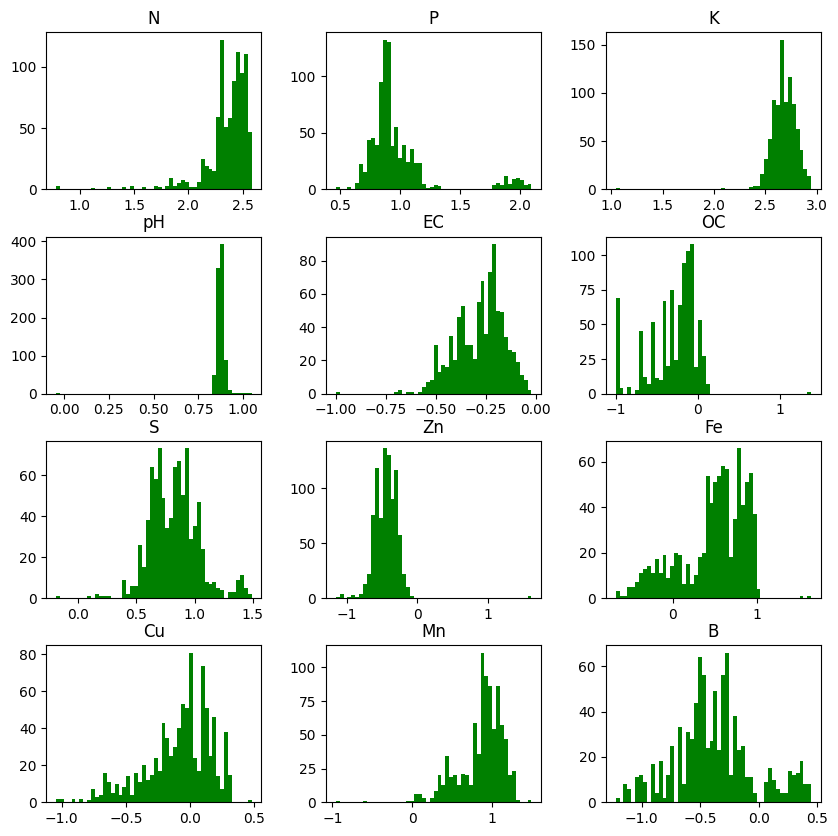

In [27]:
transformedFeatures.hist(bins=50, figsize=(10, 10), color='green', grid=False)
plt.show()

#Choose a Model

### Splitting data into train and val

In [28]:
from sklearn.model_selection import train_test_split

trainInput, validationInput, trainTarget, validationTarget = train_test_split(transformedFeatures, labels, test_size = 0.2, shuffle=True, random_state = 42)
print("Train Data Shape: ", trainInput.shape)

Train Data Shape:  (704, 12)


In [29]:
trainTarget = trainTarget.values.ravel()

In [30]:
svcClf = SVC()
svcClf.fit(trainInput, trainTarget)

SVC()

In [31]:
forestClf = ensemble.RandomForestClassifier()
forestClf.fit(trainInput, trainTarget)

RandomForestClassifier()

In [32]:
nbClf = GaussianNB()
nbClf.fit(trainInput, trainTarget)

GaussianNB()

In [33]:
knnClf = KNeighborsClassifier()
knnClf.fit(trainInput, trainTarget)

KNeighborsClassifier()

In [34]:
treeClf = tree.DecisionTreeClassifier()
treeClf.fit(trainInput, trainTarget)

DecisionTreeClassifier()

SVC  accuarcy is  0.7897727272727273
RandomForestClassifier  accuarcy is  0.8636363636363636
GaussianNB  accuarcy is  0.5795454545454546
KNeighborsClassifier  accuarcy is  0.7329545454545454
DecisionTreeClassifier  accuarcy is  0.8352272727272727


<Axes: >

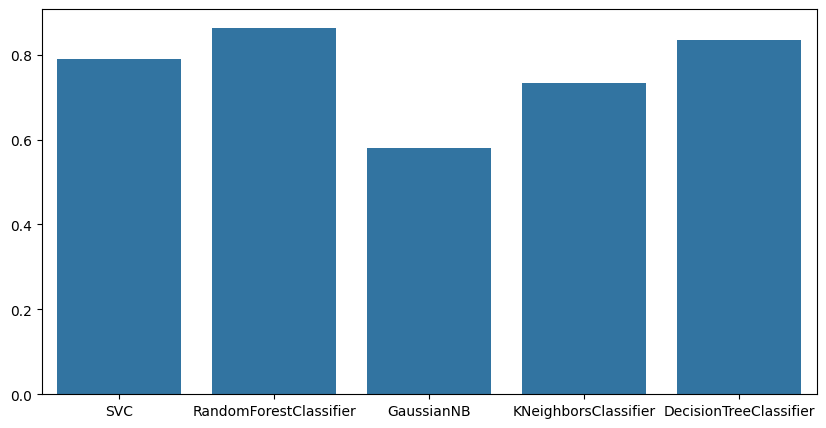

In [35]:
models = [svcClf, forestClf, nbClf, knnClf, treeClf]
accs = []
titles = []

for model in models:
    pred = model.predict((validationInput))
    model_acc = accuracy_score(validationTarget, pred)
    accs.append(model_acc)
    titles.append(type(model).__name__)
    print(type(model).__name__, " accuarcy is ", model_acc)

fig = plt.figure(figsize=(10, 5))
sns.barplot(x = titles, y=accs)

### Pros & Cons
**SVC**
1. clear margin of separation between classes
2. more effective in high dimensional spaces
3. effective in cases where the number of dimensions is greater than the number of samples
4. memory efficient                                                                                                          
5. not suitable for large data sets                                                                                          

**Random Forest Classifier**
1. quite fast
2. able to deal with unbalanced and missing data
3. may over-fit data sets that are particularly noisy
4. data-hungry

**GaussianNB**
1. very fast 
2. better than other models with less training data if the assumption of independence of features holds
3. If you have categorical input variables, the Naive Bayes algorithm performs exceptionally well in comparison to numerical variables
4. effectively works in Multi-class predictions.

**KNeighborsClassifier**
1. robust to noisy data
2. effective if the training data is large

**DecisionTreeClassifier**
1. does not require normalization of data
2. does not require scaling of data as well
3. higher time to train the model

# Fine Tuning RandomForest 

In [36]:
forestClassifier = ensemble.RandomForestClassifier(random_state=42)

In [37]:
paramGrid = { 
    'n_estimators': [200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6 ,7 ,8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [38]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=forestClassifier, param_grid=paramGrid, cv= 5)
clf.fit(trainInput, trainTarget)

c:\Users\92310\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
210 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\92310\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\92310\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\92310\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\U

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [39]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 300}

# Fit the Model

In [42]:
randomForestModel = ensemble.RandomForestClassifier(criterion = 'gini',
 max_depth = 10,
 n_estimators = 300, random_state=42)

In [43]:
randomForestModel.fit(trainInput, trainTarget)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [45]:
predictions = randomForestModel.predict(validationInput)

In [46]:
# import warnings
# warnings.filterwarnings('always') 
# warnings.filterwarnings('ignore')

In [47]:
report = classification_report(validationTarget, predictions)
report

c:\Users\92310\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\92310\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\92310\miniconda3\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92        78\n           1       0.86      0.89      0.87        88\n           2       0.00      0.00      0.00        10\n\n    accuracy                           0.87       176\n   macro avg       0.58      0.62      0.60       176\nweighted avg       0.82      0.87      0.84       176\n'

In [48]:
mode_acc = accuracy_score(validationTarget, predictions)
mode_acc

0.8693181818181818

### Save model as pkl

In [49]:
import pickle

with open('random_forest_pkl.pkl', 'wb') as file:
    pickle.dump(model, file)

### Load model

In [50]:
with open('random_forest_pkl.pkl', 'rb') as file:
    model = pickle.load(file)